<a href="https://colab.research.google.com/github/denikn/Machine-Learning-MIT-Assignment/blob/main/Week%2001%20-%20Basics/Week01_Homework_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Numpy procedures for hyperplanes and separators

Relevant material on linear classifiers in the notes

Helpful numpy explanations at the bottom of the page.

## 1.1) General hyperplane, distance to point

Let pp be an arbitrary point in R^dR 
d
 . Give a formula for the signed perpendicular distance from the hyperplane specified by \theta, \theta_0θ,θ 
0
​
  to this point pp.

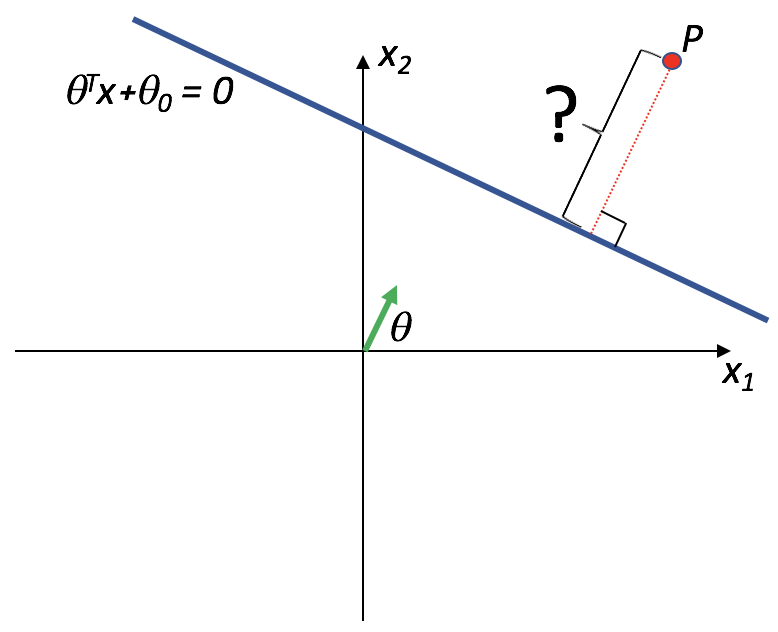

Enter your answer as a Python expression. Use theta for \thetaθ, theta_0 for \theta_0θ 
0
​
 , p for the point p,p, transpose(x) for transpose of an array, norm(x) for the length (L2-norm) of a vector, and x@y to indicate a matrix product of two arrays.
 
 Formula for signed distance:

In [ ]:
print("1st solution : (transpose(theta)@p + theta_0) / norm(theta)")
print("2st solution : (transpose(p)@theta + theta_0) / norm(theta)")

1st solution : (transpose(theta)@p + theta_0) / norm(theta)
2st solution : (transpose(p)@theta + theta_0) / norm(theta)


## 1.2) Code for signed distance!

Write a Python function using numpy operations (no loops!) that takes column vectors (dd by 1) x and th (of the same dimension) and scalar th0 and returns the signed perpendicular distance (as a 1 by 1 array) from the hyperplane encoded by (th, th0) to x. Note that you are allowed to use the "length" function defined in previous coding questions (includig week 1 exercises).

In [ ]:
import numpy as np

import numpy as np
def length(col_v):
    return np.sqrt(np.sum(np.square([col_v])))

# x is dimension d by 1
# th is dimension d by 1
# th0 is a scalar
# return 1 by 1 matrix of signed distance
def signed_dist(x, th, th0):
   return ((th.T@x) + th0) / length(th)

print(signed_dist(np.array([[0],[0]]), np.array([[3],[4]]), 5))

[[1.]]


## 1.3) Code for side of hyperplane

Write a Python function that takes as input

a column vector x

a column vector th that is of the same dimension as x

a scalar th0

and returns

+1 if x is on the positive side of the hyperplane encoded by (th, th0)

0 if on the hyperplane

-1 otherwise.

The answer should be a 2D array (a 1 by 1). Look at the \href{https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sign.html}{sign}sign function. Note that you are allowed to use any functions defined in week 1's exercises.

In [ ]:
import numpy as np
# x is dimension d by 1
# th is dimension d by 1
# th0 is dimension 1 by 1
# return 1 by 1 matrix of +1, 0, -1
def positive(x, th, th0):
   return np.sign(np.dot(np.transpose(th), x) + th0)

print(positive(np.array([[0],[0]]), np.array([[3],[4]]), 5))

[[1]]


Now, given a hyperplane and a set of data points, we can think about which points are on which side of the hyperplane. This is something we do in many machine-learning algorithms, as we will explore soon. It is also a chance to begin using numpy on larger chunks of data.

## 1.4) Expressions operating on data

We define data to be a 2 by 5 array (two rows, five columns) of scalars. It represents 5 data points in two dimensions. We also define labels to be a 1 by 5 array (1 row, five columns) of 1 and -1 values.

data = np.transpose(np.array([[1, 2], [1, 3], [2, 1], [1, -1], [2, -1]]))

labels = rv([-1, -1, +1, +1, +1])

For each subproblem, provide a Python expression that sets A to the quantity specified. Note that A should always be a 2D numpy array. Only one relatively short expression is needed for each one. No loops!

You can use (our version) of the length and positive functions; they are already defined, don't paste in your definitions. Those functions if written purely as matrix operations should work with a 2D data array, not just a single column vector as the first argument, with no change.

1. A should be a 1 by 5 array of values, either +1, 0 or -1, indicating, for each point in data, whether it is on the positive side of the hyperplane defined by th, th0. Use data, th, th0 as variables in your submission.

In [ ]:
import numpy as np

data = np.transpose(np.array([[1, 2], [1, 3], [2, 1], [1, -1], [2, -1]]))
# labels = rv([-1, -1, +1, +1, +1])
th = 0
th0 = 0

A = positive(data, th, th0) # the answer should be like this

def positive(x, th, th0):
   return np.sign(np.dot(np.transpose(th), x) + th0)

2. A should be a 1 by 5 array of boolean values, either True or False, indicating for each point in data and corresponding label in labels whether it is correctly classified by hyperplane th = [1, 1], th0 = -2 . That is, return True when the side of the hyperplane (specified by \thetaθ, \theta_0θ 
0
​ ) that the point is on agrees with the specified label.

In [ ]:
import numpy as np
# labels = rv([-1, -1, +1, +1, +1])
# A = (labels == positive(data, cv([1, 1]), -2))

## 1.5) Score

Write a procedure that takes as input

    data: a d by n array of floats (representing n data points in d dimensions)
    
    labels: a 1 by n array of elements in (+1, -1), representing target labels

    th: a d by 1 array of floats that together with

    th0: a single scalar or 1 by 1 array, represents a hyperplane 
    
and returns the number of points for which the label is equal to the output of the positive function on the point.

Since numpy treats False as 0 and True as 1, you can take the sum of a collection of Boolean values directly.



In [ ]:
import numpy as np
# data is dimension d by n
# labels is dimension 1 by n
# ths is dimension d by 1
# th0s is dimension 1 by 1
# return 1 by 1 matrix of integer indicating number of data points correct for
# each separator.
def score(data, labels, th, th0):
   return np.sum(positive(data, th, th0) == labels)

## 1.6) Best separator

Now assume that we have some "candidate" classifiers that we want to pick the best one out of. Assume you have ths, a dd by mm array of mm candidate \thetaθ's (each \thetaθ has dimension dd by 1), and th0s, a 1 by mm array of the corresponding mm candidate \theta_0θ 
0
​
 's. Each of the \thetaθ, \theta_0θ 
0
​
  pair represents a hyperplane that characterizes a binary classifier.

Write a procedure that takes as input

    data: a d by n array of floats (representing n data points in d dimensions)
    labels: a 1 by n array of elements in (+1, -1), representing target labels
    ths: a d by m array of floats representing mm candidate \thetaθ's (each \thetaθ has dimension dd by 1)
    th0s: a 1 by m array of the corresponding mm candidate \theta_0θ 
    0's.
    
and finds the hyperplane with the highest score on the data and labels. In case of a tie, return the first hyperplane with the highest score, in the form of

    a tuple of a d by 1 array and an offset in the form of 1 by 1 array.
    
The function score that you wrote above was for a single hyperplane separator. Think about how to generalize it to multiple hyperplanes and include this modified (if necessary) definition of score in the answer box.

Note: Look below the answer box for useful numpy functions!

In [ ]:
import numpy as np
# data is dimension d by n
# labels is dimension 1 by n
# ths is dimension d by m
# th0s is dimension 1 by m
# return matrix of integers indicating number of data points correct for
# each separator:  dimension m x 1
def score_mat(data, labels, ths, th0s):
   pos = np.sign(np.dot(np.transpose(ths), data) + np.transpose(th0s))
   return np.sum(pos == labels, axis = 1, keepdims = True)
def best_separator(data, labels, ths, th0s):
   best_index = np.argmax(score_mat(data, labels, ths, th0s))
   return cv(ths[:,best_index]), th0s[:,best_index:best_index+1]

# Reference Material: Handy Numpy Functions and Their Usage

In order to avoid using for loops, you will need to use the following numpy functions. (So that you replace for loops with matrix operations)

## A. np.sum with axis

np.sum can take an optional argument axis. Axis 0 is row and 1 is column in a 2D numpy array. The way to understand the “axis” of numpy sum is that it sums(collapses) the given matrix in the direction of the specified axis. So when it collapses the axis 0 (row), it becomes just one row and column-wise sum. Let's look at examples.

    >>> np.sum(np.array([[1,1,1],[2,2,2]]), axis=1)
    array([3, 6])
    >>> np.sum(np.array([[1,1,1],[2,2,2]]), axis=0)
    array([3, 3, 3])

Note that axis=1 (column) will "squash" (or collapse) sum np.array([[1,1,1],[2,2,2]]) in the column direction. On the other hand, axis=0 (row) will collapse-sum np.array([[1,1,1],[2,2,2]]) in the row direction.

## B. Comparing matrices of different dimensions / advanced np.sum

Note that two matrices A, B below have same number of columns but different row dimensions.

    >>> A = np.array([[1,1,1],[2,2,2],[3,3,3]])
    >>> B = np.array([[1,2,3]])
    >>> A==B
    array([[ True, False, False],
           [False,  True, False],
           [False, False,  True]])
           
The operation A==B copies B three times row-wise so that it matches the dimension of A and then element-wise compaires A and B.

We can apply A==B to np.sum like below.

    >>> A = np.array([[1,1,1],[2,2,2],[3,3,3]])
    >>> B = np.array([[1,0,0],[2,2,0],[3,3,3]])
    >>> np.sum(A==B, axis=1)
    array([1, 2, 3])

## C. np.sign

np.sign, given a numpy array as input, outputs a numpy array of the same dimension such that its element is the sign of each element of the input. Let's look at an example.
    
    >>> np.sign(np.array([-3,0,5]))
    array([-1,  0,  1])

## D. np.argmax

np.argmax, given a numpy array as input, outputs the index of the maximum element of the input. Let's look at an example.

    >>> np.argmax(np.array([[1,2,3],[4,5,6]]))
    5
    
Note that the argmax index is given assuming the input array is flattened. So in our case, with 6 being the maximum element, 5 was returned instead of something like (1,2).

## E. np.reshape

For a np array A, you can call A.reshape((dim1_size,dim2_size,...)) in order to change the shape of the array.

    >>> A = np.array([[1,2,3],[4,5,6]])
    >>> A.reshape((3,2))
    array([[1, 2],
           [3, 4],
           [5, 6]])
           
Note, the new shape has to have the same number of elements as the original.